In [ ]:
import numpy as np
import pyfk
from pyfk import SourceModel, SeisModel, Config
import matplotlib.pyplot as plt

model_data = np.array(
    [  [  2.1     ,    2.0    ,    4.0    ,    2.6    ,  600.     ,1200.     ],
       [  30.1    ,    3.7    ,    6.0    ,    2.9    ,  600.     ,1200.     ],
       [  200    ,    4.5    ,    8.1    ,    3.3    ,  600.     ,1200.     ],]
)

# model_data = np.array(
#     [  [  180.1    ,    3.7    ,    6.0    ,    2.9    ,  600.     ,1200.     ],]
# )

model = SeisModel(model=model_data)

source = SourceModel(sdep=30, srcType="dc")

config = Config(
        model=model,
        source=source,
        npt=512,
        dt=0.05,
        receiver_distance=np.arange(50,55,5))

print(config)

from pyfk import calculate_gf
gf = calculate_gf(config)
print(gf)

Config(model=SeisModel(layers=2, flattening=False), source=SourceModel(sdep=30, srcType=dc, source_mechanism=None), receiver_distance=[50.], taper=0.3, filter=(0, 0), npt=512, dt=0.05, dk=0.3, smth=1.0, pmin=0.0, pmax=1.0, kmax=15.0, rdep=0.0, updn=all, samples_before_first_arrival=50, suppression_sigma=2.0)


(-0.003624446141108454, 0.0023802251117072976)

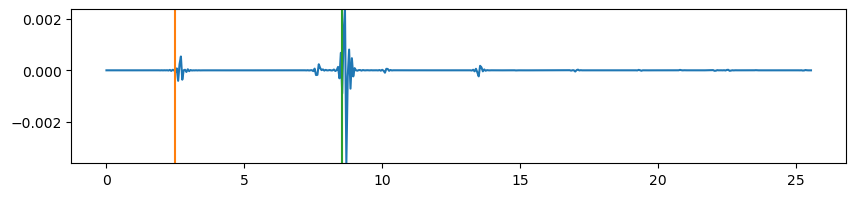

In [10]:
plt.figure(figsize=(10,2))
plt.plot(np.arange(0, 512)*0.05, gf[0][0].data)
pt = np.sqrt(30**2+50**2)/6
st = np.sqrt(30**2+50**2)/3.7
plt.plot([2.5, 2.5], [-1, 1])
plt.plot([2.5+st-pt, 2.5+st-pt], [-1, 1])
plt.ylim([np.min(gf[0][0].data), np.max(gf[0][0].data)])

In [5]:

import obspy
from pyfk import calculate_sync
from pyfk import generate_source_time_function

source_time_function=generate_source_time_function(dura=0.5, rise=0.5, delta=gf[0][0].stats.delta)

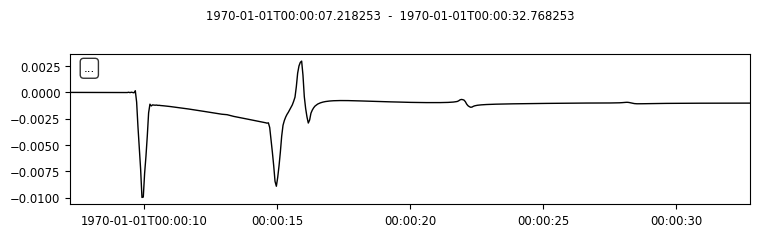

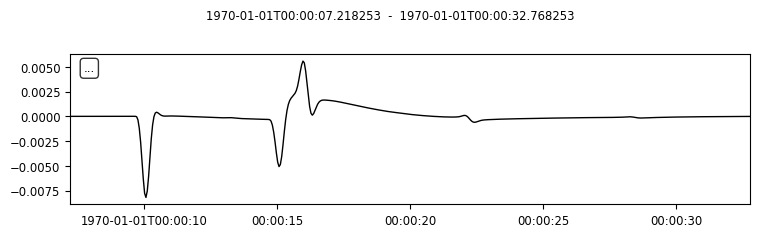

In [42]:
source.update_source_mechanism(np.array([4.0, 0, 90, 0]))
sync_result = calculate_sync(gf, config, -10, source_time_function)
sync_result_to_filter=sync_result[0][1].copy()
N = len(sync_result_to_filter.data)
sync_result_to_filter.data = np.tril(np.ones((N,N)), 0).dot(sync_result_to_filter.data.reshape(N, -1)).reshape(-1,)
sync_result_to_filter.plot();
#sync_result_to_filter.detrend("linear")
#sync_result_to_filter.taper(max_percentage=0.05, type='hann')
sync_result_to_filter.filter("bandpass", freqmin=0.05, freqmax=2, corners=2)
sync_result_to_filter.plot();

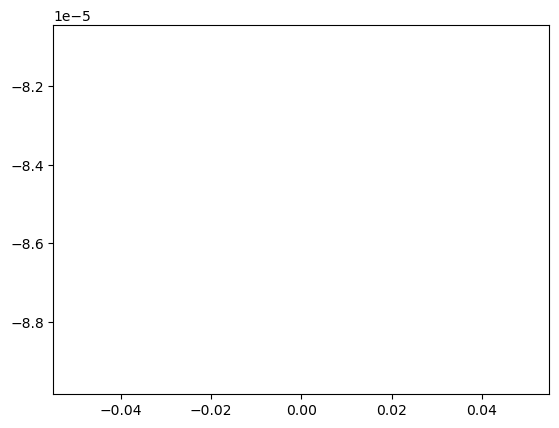

In [16]:
plt.plot(np.trapz(sync_result_to_filter.data))

In [18]:
np.trapz(sync_result_to_filter.data)

-8.513906806650062e-05

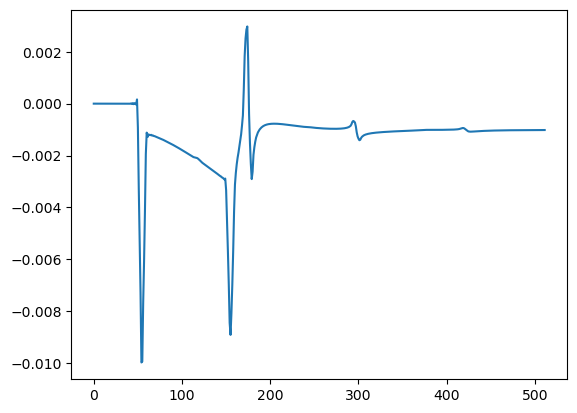

In [31]:
tr = sync_result[0][1].data
N = len(tr)
sum_tr = np.tril(np.ones((N,N)), 0).dot(tr.reshape(N, -1))
plt.plot(sum_tr)
